In [2]:
from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

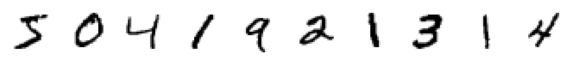

In [5]:
_, ax = plt.subplots(1, 10, figsize=(10,10))

for i in range(0, 10):
    ax[i].axis('off')
    ax[i].imshow(train_images[i], cmap=plt.cm.binary)

In [6]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)              

In [9]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images= train_images.astype('float32') / 255 # rescale pixel values from range [0, 255] to [0, 1]

test_images = test_images.reshape((10000, 28, 28, 1))
test_images= test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

validation_images = train_images[50000:]
validation_labels = train_labels[50000:]

train_images = train_images[:50000]
train_labels = train_labels[:50000]

history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 38s 751us/step - loss: 0.1754 - accuracy: 0.9452 - val_loss: 0.0637 - val_accuracy: 0.9817
Epoch 2/5
50000/50000 [==============================] - 37s 746us/step - loss: 0.0458 - accuracy: 0.9857 - val_loss: 0.0372 - val_accuracy: 0.9898
Epoch 3/5
50000/50000 [==============================] - 38s 768us/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.0340 - val_accuracy: 0.9901
Epoch 4/5
50000/50000 [==============================] - 39s 775us/step - loss: 0.0235 - accuracy: 0.9932 - val_loss: 0.0451 - val_accuracy: 0.9874
Epoch 5/5
50000/50000 [==============================] - 41s 823us/step - loss: 0.0170 - accuracy: 0.9948 - val_loss: 0.0364 - val_accuracy: 0.9898


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

10000/10000 [==============================] - 2s 241us/step
Accuracy: 0.9909999966621399
Loss:  0.03005490345353901


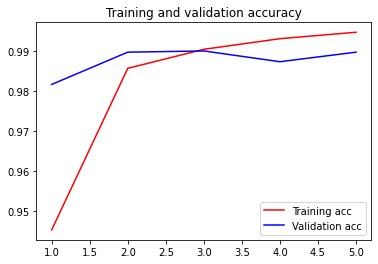

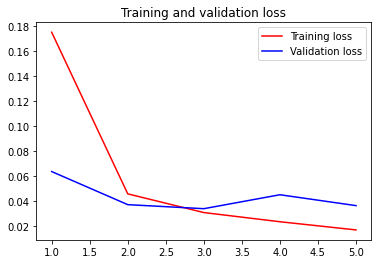

In [15]:
def plot_accuracy_and_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_accuracy_and_loss(history)
